<a href="https://colab.research.google.com/github/jubedoyag/MetNumUN2021II/blob/main/Lab15/BisectionConvergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

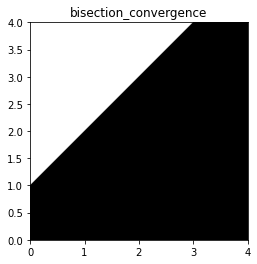

In [23]:
extent = 0.0, 4.0, 0.0, 4.0 
   
width = 400
height= 400
pixels = np.full((width,height,3),0)
for i in range(width):
  for j in range(height):
    if (j>i+100): 
      pixels[height-j-1,i,0] = pixels[height-j-1,i,1] = pixels[height-j-1,i,2] = 255
      #print(i,j)

plt.title('bisection_convergence')
plt.imshow(pixels,extent = extent)
plt.show()

Text(0, 0.5, 'f(x)')

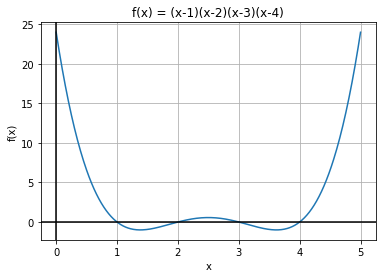

In [17]:
# Based on https://www.geeksforgeeks.org/program-for-bisection-method/
# Python program for implementation 
# of Bisection Method for 
# solving equations 
  


def func(x): 
    return (x-1) *(x-2) *(x-3)*(x-4)


x = np.linspace(0.0,5.0,500)
fig, ax = plt.subplots()
ax.plot(x,func(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x) = (x-1)(x-2)(x-3)(x-4)')
plt.xlabel('x')
plt.ylabel('f(x)')


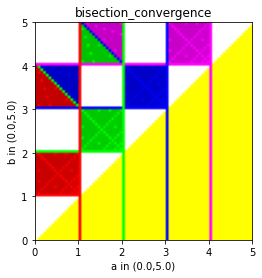

In [24]:
width = height = 80
xi=0.0
xf=5.0
eps = 1e-3
mxiter = 1e4

pixels = np.full((width,height,3),0)
# roots
r1 = 1
r2 = 2
r3 = 3
r4 = 4
   
multcol = 5

for i in range(height):
            
            aa =   float(xi + (i * (xf-xi) /height))
            
            for j in range(width):
                bb= float(xi + (j* (xf-xi)/ width))

                a = aa
                b = bb
                c=a
                iter = 0
                
                while ((b-a) >= eps and (func(a) * func(b) <= 0)): 
                   
                    # Check if a is root 
                    if (func(a) == 0.0): 
                      c=a
                      break

                    # Check if b is root 
                    if (func(b) == 0.0): 
                      c=b
                      break
  
                    # Find middle point 
                    c = (a+b)/2
    
                    # Decide the side to repeat the steps 
                    if (func(c)*func(a) < 0): 
                        b = c 
                    else: 
                        a = c 
                    
                    iter = iter + 1
                    
                    if (iter > mxiter):
                     break

                # Pixels colored using the roots
                if abs(c-r1)<eps:
                    # color red
                    pixels[height-j-1,i] = (255 - iter*multcol, 0, 0)
                elif abs(c-r2)<=eps:
                    # color green
                    pixels[height-j-1,i] = (0, 255 - iter*multcol, 0)
                elif abs(c-r3)<=eps:
                    # color blue
                    pixels[height-j-1,i] = (0, 0, 255 - iter*multcol)
                elif abs(c-r4)<=eps:
                    # color violet
                    pixels[height-j-1,i] = (255 - iter*multcol, 0, 255 - iter*multcol)
                elif (b < a):
                    # color yellow 
                    pixels[height-j-1,i] = (255, 255, 0)
                elif (func(a) * func(b) >= 0):
                    # color white, does not converge
                    pixels[height-j-1,i] = (255, 255, 255)
                else:   
                    pixels[height-j-1,i] = (0, 0, 0)

                
     
plt.title('bisection_convergence')
plt.xlabel("a in ("+str(xi)+","+str(xf)+")")
plt.ylabel("b in ("+str(xi)+","+str(xf)+")")
extent = xi, xf, xi, xf
plt.imshow(pixels,extent =extent)
plt.show()

Las regiones donde se converge a un número concreto cumplen con 2 condiciones:

1) el número b es mayor o igual que el número a (para el correcto funcionamiento del algoritmo)

2) la multiplicación de las imágenes del número b y del número a debe negativa (esto indica un cambio de signo en la función en el intervalo (a,b) y asegura que existe un cero en éste)

Dicho lo anterior, se puede especificar la convergencia de las regiones con mayor facilidad:

Si $ a\in \left [ 0,1 \right ) $ y $ b\in \left ( 1,2 \right ) $ se converge a 1 (al color rojo en la gráfica de colores)

Si $ a\in \left ( 1,2 \right ) $ y $ b\in \left ( 2,3 \right ) $ se converge a 2 (al color verde)

Si $ a\in \left ( 2,3 \right ) $ y $ b\in \left ( 3,4 \right ) $ se converge a 3 (al color azul)

Si $ a\in \left ( 3,4 \right ) $ y $ b\in \left ( 4,5 \right ) $ se converge a 4 (al color violeta)

Si $ a $ o $ b $ son una raíz convergerán a esa misma raíz.

Visualizando la gráfica de la función se puede ver el porqué se converge a las raices descritas anteriormente, sin embargo, surge la duda de que ocurre cuando los intervalos de $a$ y $b$ no son continuos pero cumplen con las condiciones iniciales, su comportamiento no parece ser intuitivo a simple vista, pero la gráfica de colores sí nos da información para describir la región:

Si $ a\in \left [ 0,1 \right ) $ y $ b\in \left ( 3,4 \right ) $ se tiene la recta $ a + b = 4 $ para converger al 2, la desigualdad $ a + b < 4 $ para converger al 1 y la desigualdad $ a + b > 4 $ para converger al 3.

Igualmente para el caso donde $ a\in \left ( 1,2 \right ) $ y $ b\in \left ( 4,5 \right ) $ se tiene la recta $ a + b = 6 $ para converger al 3, la desigualdad $ a + b < 6 $ para converger al 2 y la desigualdad $ a + b > 6 $ para converger al 4.

Finalmente describiendo las regiones donde no se cumple alguna de las condiciones iniciales se tiene el caso trivial donde $ b < a $ el cual se pinta de amarillo. Cuando las imágenes de $ b $ y $a$ no tienen un cambio de signo (de lo cual se deduce que no existe ningun 0 en el intervalo, y por tanto no funcionaría el algoritmo) se pinta de blanco la región.


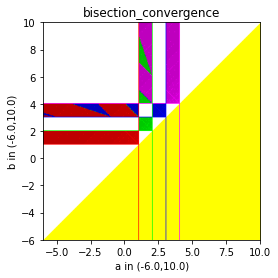

In [32]:
width = height = 320
xi=-6.0
xf=10.0
eps = 1e-3
mxiter = 1e4

pixels = np.full((width,height,3),0)
# roots
r1 = 1
r2 = 2
r3 = 3
r4 = 4
   
multcol = 5

for i in range(height):
            
            aa =   float(xi + (i * (xf-xi) /height))
            
            for j in range(width):
                bb= float(xi + (j* (xf-xi)/ width))

                a = aa
                b = bb
                c=a
                iter = 0
                
                while ((b-a) >= eps and (func(a) * func(b) <= 0)): 
                   
                    # Check if a is root 
                    if (func(a) == 0.0): 
                      c=a
                      break

                    # Check if b is root 
                    if (func(b) == 0.0): 
                      c=b
                      break
  
                    # Find middle point 
                    c = (a+b)/2
    
                    # Decide the side to repeat the steps 
                    if (func(c)*func(a) < 0): 
                        b = c 
                    else: 
                        a = c 
                    
                    iter = iter + 1
                    
                    if (iter > mxiter):
                     break

                # Pixels colored using the roots
                if abs(c-r1)<eps:
                    # color red
                    pixels[height-j-1,i] = (255 - iter*multcol, 0, 0)
                elif abs(c-r2)<=eps:
                    # color green
                    pixels[height-j-1,i] = (0, 255 - iter*multcol, 0)
                elif abs(c-r3)<=eps:
                    # color blue
                    pixels[height-j-1,i] = (0, 0, 255 - iter*multcol)
                elif abs(c-r4)<=eps:
                    # color violet
                    pixels[height-j-1,i] = (255 - iter*multcol, 0, 255 - iter*multcol)
                elif (b < a):
                    pixels[height-j-1,i] = (255, 255, 0)
                elif (func(a) * func(b) >= 0):
                    pixels[height-j-1,i] = (255, 255, 255)
                else:   
                    pixels[height-j-1,i] = (0, 0, 0)

                
     
plt.title('bisection_convergence')
plt.xlabel("a in ("+str(xi)+","+str(xf)+")")
plt.ylabel("b in ("+str(xi)+","+str(xf)+")")
extent = xi, xf, xi, xf
plt.imshow(pixels,extent =extent)
plt.show()